Forma del dataset: (1797, 64)
Clases: [0 1 2 3 4 5 6 7 8 9]


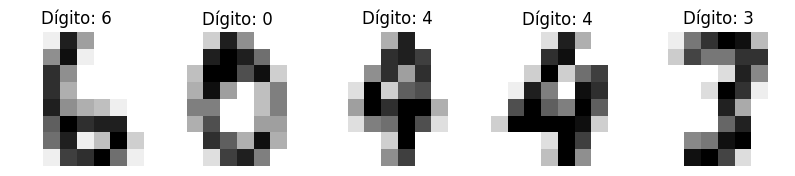


Matriz de confusión:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  2  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  1  0  0  2  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  2]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  2 57]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy            

In [ ]:
# 1. Importar librerías
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# 2. Cargar dataset (imágenes 8x8 de dígitos)
digits = datasets.load_digits()

print(f"Forma del dataset: {digits.data.shape}")  # 1797 imágenes de 64 píxeles
print(f"Clases: {digits.target_names}")

# 3. Visualizar algunas imágenes
indices = np.random.choice(len(digits.images), size=5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, idx in zip(axes, indices):
    image = digits.images[idx]
    label = digits.target[idx]
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f'Dígito: {label}')
    ax.axis('off')
plt.show()

# 4. Preparar datos
X = digits.data  # aplanado (64 características por imagen)
y = digits.target

# 5. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Escalar características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Modelo: Regresión logística
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# 8. Predicciones
y_pred = model.predict(X_test)

# 9. Evaluación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))